# Beyond Linearity

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [3]:
# importing the Auto dataset
auto = pd.read_csv('data/Auto.csv')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
# Let's look at type of an element in the horsepower column
type(auto.horsepower.iloc[0])

str

In [5]:
# Convert the horsepower column to numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['horsepower'].isna().sum()

5

In [6]:
auto.fillna({'horsepower' : auto['horsepower'].mean()}, inplace=True) 
auto['horsepower'].isna().sum()

0

In [7]:
# Let's add the quadratic term of the horsepower
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [8]:
# Parameters estimation with statsmodels of a quadratic term and the linear term
est = smf.ols('mpg ~ horsepower', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.45e-79
Time:                        15:32:06   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0058      0.729     54.903      0.000      38.573      41.438
horsepower    -0.1578      0.007    -24.096      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       21.884   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.108
Skew:                           0.557   Prob(JB):                     5.82e-06
Kurtosis:                       3.464   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Parameters estimation with statsmodels of a quadratic term and the linear term
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.4194,1.849,30.517,0.000,52.785,60.054
horsepower,-0.4558,0.032,-14.281,0.000,-0.519,-0.393
horsepower2,0.0012,0.000,9.500,0.000,0.001,0.001


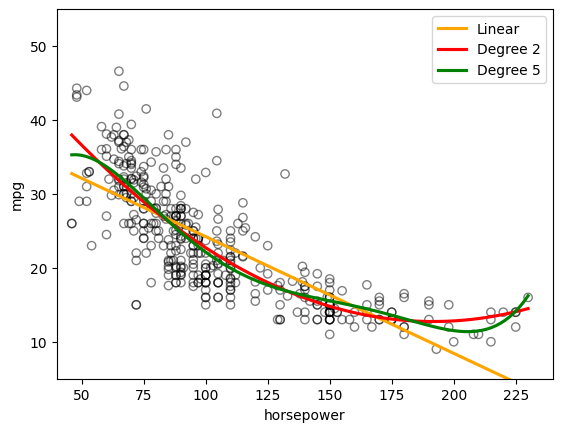

In [10]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='red')
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240)
plt.show()